## GemPy Models - Some Examples

In [2]:
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano

../../../gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
../../../gempy/posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")


### Choose a model and load the corresponding data set in the line below

Model 1: Discordant layering

Model 2: Anticlinal layering

Model 3: Parallel steep dipping layers

Model 5: Normal faulting

Model 6: Synclinal layering

Model 7: Graben structure with two faults

Model 8: Similar to Model 5

Model 9: Parallel flat dipping layers

In [17]:
#geo_data = gp.InputData([0,2000,0,2000,0,1600], [100,100,100],
#      path_o = os.pardir+"/input_data/foliations1.csv",
#      path_i = os.pardir+"/input_data/interfaces1.csv")

geo_data = gp.InputData([0,2000,0,2000,0,1600], [100,100,100],
      path_o = os.path.abspath("./input_data/foliations7.csv"),
      path_i = os.path.abspath("./input_data/interfaces7.csv"))
                        

/home/miguel/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


### Run the corresponding line for the chosen model!

In [5]:
### Model 1 - Discordant layering ###
gp.set_series(geo_data, {"Strat_Series_1":('Sandstone','Siltstone','Shale'),
                         "Strat_Series_2":('Sandstone2','Siltstone2','Shale2')},
            order_series = ['Strat_Series_1', 'Strat_Series_2'],
            order_formations=['Sandstone','Siltstone','Shale','Sandstone2','Siltstone2','Shale2'], verbose=0)

In [95]:
### Model 5 - One normal Fault ###
### Model 8 - ###
gp.set_series(geo_data, {"Fault_Series":'Main_Fault',
                         "Strat_Series": ('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
            order_series = ["Fault_Series", 'Strat_Series'],
            order_formations=['Main_Fault','Sandstone','Siltstone','Shale',
                              'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)

In [87]:
### Model 2 - Aufwölbung (durch Salzstock?) ###
### Model 3+9 - Parallele NNE Schichtung ohne Verwerfung ###
### Model 6 - Mulde ###
gp.set_series(geo_data, {"Strat_Series":('Sandstone','Siltstone','Shale','Sandstone_2', 'Schist', 'Gneiss')},
            order_series = ['Strat_Series'],
            order_formations=['Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)

In [18]:
### Model 7 - Graben ###
gp.set_series(geo_data, {"Fault_1":'Fault_1',"Fault_2":'Fault_2',
                         "Strat_Series":('Sandstone','Siltstone','Shale', 'Sandstone_2', 'Schist', 'Gneiss')},
            order_series = ["Fault_1","Fault_2", 'Strat_Series'],
            order_formations=['Fault_1','Fault_2','Sandstone','Siltstone','Shale',
                              'Sandstone_2', 'Schist', 'Gneiss'], verbose=0)

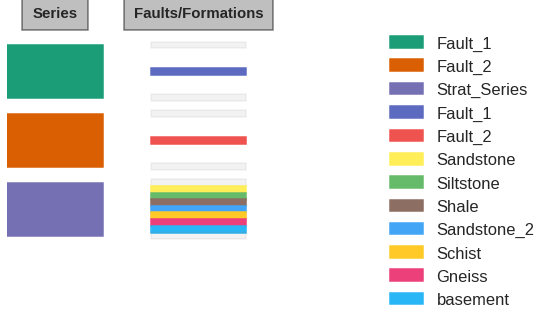

In [19]:
%matplotlib inline
gp.get_sequential_pile(geo_data);

### Interpolation, Modelling and Plotting in one step

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  2


/home/miguel/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


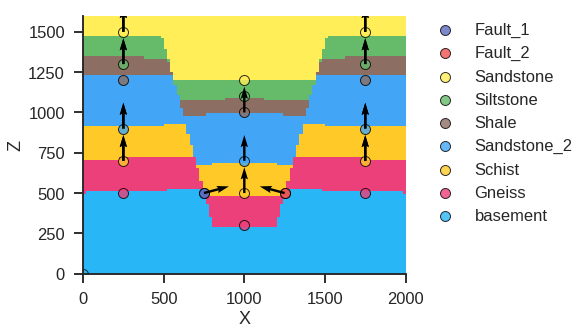

In [20]:
# Interpolation and Computation
interp_data = gp.InterpolatorData(geo_data,
                                  output='geology', compile_theano=True,
                                  theano_optimizer='fast_compile',
                                  verbose=[])
lith_block, fault_block = gp.compute_model(interp_data, get_potential_at_interfaces=False)
#ver , sim = gp.get_surfaces(interp_data, lith_block[1], fault_block[1])

# 2D Plot
%matplotlib inline
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=25,
                         direction='y', plot_data=True)

In [22]:
# 3D Plot
vtk_plot = gp.plotting.vtkPlot(geo_data)
ver, sim = gp.get_surfaces(interp_data, lith_block[1],None)
vtk_plot.plot_surfaces_3D_real_time(interp_data, ver, sim, size=(1920, 2160))

closing vtk


In [21]:
gp.data_to_pickle(interp_data, 'lisa-7')

../../../gempy/interpolator.py:186: UserWarning: Pickling an InterpolatorData object is EXPERIMENTAL and on your own risk. Try to adjust the recursionlimit.
  warnings.warn('Pickling an InterpolatorData object is EXPERIMENTAL and on your own risk. Try to adjust the recursionlimit.')


In [14]:
i = gp.read_pickle('lisa-1.pickle')

In [16]:

gp.compute_model(i)

/home/miguel/anaconda3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


[array([[ 7.      ,  7.      ,  7.      , ...,  1.      ,  1.      ,
          1.      ],
        [10.71307 , 10.721241, 10.729412, ..., 41.5402  , 41.550865,
         41.561535]], dtype=float32),
 array([], shape=(0, 1000000), dtype=float32)]